# Customizing Plot Legends

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

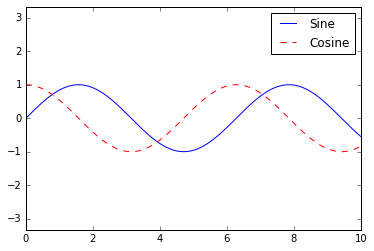

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt. subplots()
ax.plot(x, np.sin(x), '-b', label = 'Sine')
ax.plot(x, np.cos(x), '--r', label = 'Cosine')
ax.axis('equal')
leg = ax.legend();

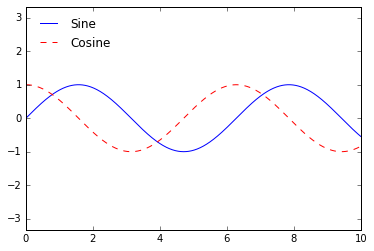

In [4]:
ax.legend(loc='upper left', frameon=False)
fig

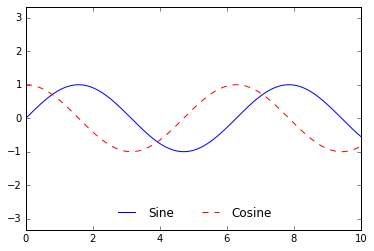

In [5]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

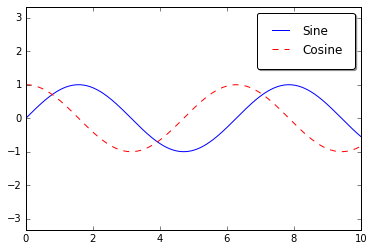

In [6]:
ax.legend(
            fancybox=True
          , framealpha=1
          , shadow=True
          , borderpad=1
         )
fig

## Choosing Elements for the Legend

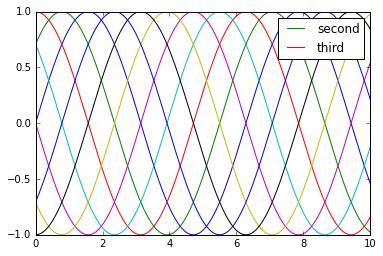

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.25))
lines = plt.plot(x, y) # plt.plot() can output a list of the lines in the plot

plt.legend(lines[1:3], ['second', 'third']) # select the second and third items from the list 'lines' name them

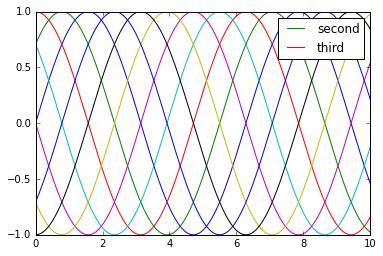

In [10]:
# Jake finds it easier to label the items individually as you plot them.

plt.plot(x, y[:, 0])
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2], label='third')
plt.plot(x, y[:,3:])

plt.legend(framealpha=1, frameon=True);

# Legend of Size of Points 

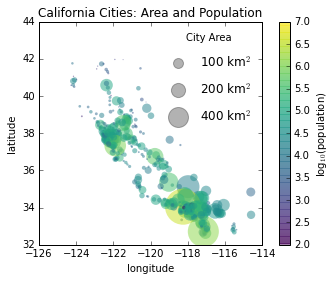

In [26]:
import pandas as pd

cities = pd.read_csv('/Users/anthonyesposito/Desktop/python_practice/Python_Practice/Basic_Coding/Numpy_Practice/PythonDataScienceHandbook-master/notebooks/data/california_cities.csv')
    
# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('scaled')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(2, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 200, 400]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');


In [25]:
cities['population_total'].min()

1

In [24]:
np.log10(3884307)

6.589313547481316

## Multiple Legends

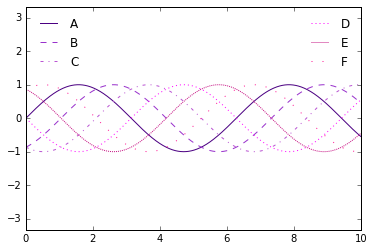

In [42]:
# use the low level 'ax.add_artist'

fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':',(0, (1, 1)),(0, (1, 10))]
colors = [ 'indigo', 'darkorchid', 'mediumorchid', 'fuchsia', 'mediumvioletred', 'deeppink']
x = np.linspace(0,10,1000)

for i in range(6):
    lines += ax.plot(x, np.sin(x - i * np.pi/3), linestyle=styles[i], color=colors[i] )
    
ax.axis('equal')

ax.legend(lines[:3], ['A', 'B', 'C'], loc='upper left', frameon=False)

from matplotlib.legend import Legend

leg = Legend(ax, lines[3:], ['D', 'E', 'F'], loc='upper right', frameon=False)

ax.add_artist(leg);